# Sentiment Analysis on Amazon Alexa Reviews

## Introduction to the Dataset

This dataset comprises reviews of Amazon Alexa, a popular voice-controlled intelligent personal assistant device. The reviews are collected from various users who have shared their experiences with the device. Sentiment analysis, a subset of natural language processing (NLP), is applied to understand and interpret the emotions expressed in these reviews.

### Dataset Overview
The dataset includes the following columns:

* **rating**: The numerical rating given by the user (1 to 5).
* **date**: The date when the review was posted.
* **variation**: Different variations or models of Amazon Alexa.
* **verified_reviews** : The text content of the reviews.
* **feedback**: Binary feedback indicating whether the review is positive (1) or negative (0).

### Key Points about the Dataset
* **Variety of Ratings**: Users have given ratings ranging from 1 to 5, providing a diverse range of opinions.

* **Various Alexa Variations**: The dataset covers multiple variations of Amazon Alexa, offering insights into the performance and user satisfaction across different models.

* **Textual Feedback**: Users not only provide numerical ratings but also share detailed feedback in text form, expressing their thoughts, opinions, and experiences.

* **Binary Feedback Label**: The 'feedback' column simplifies sentiment analysis, categorizing reviews as positive (1) or negative (0), facilitating the training of machine learning models.

## Why Sentiment Analysis?
Sentiment analysis helps us uncover valuable insights into customer opinions and emotions. By leveraging NLP techniques, we aim to classify reviews into positive, negative, or neutral sentiments. This analysis is crucial for understanding customer satisfaction, identifying areas of improvement, and informing product development decisions.

Now, let's delve into the step-by-step process of sentiment analysis on this dataset.

# Import necessary libraries

In [7]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Load the dataset
df = pd.read_csv('amazon_reviews.csv')

# Display basic information about the dataset
print("Dataset Information:\n")
print(df.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None


In [9]:
df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [10]:
# Display statistical summary of the DataFrame
print("\nDataFrame Statistical Summary:\n")
print(df.describe())



DataFrame Statistical Summary:

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000



## Drop Unnecessary Columns

In [11]:
df.drop('date', axis=1, inplace=True)

## Handling missing values


In [12]:
# Check for missing values
missing_values = df.isna().sum()

# Display the count of missing values
print("Missing Values:")
print(missing_values)

Missing Values:
rating              0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [13]:
# Drop the row with the missing value in 'verified_reviews'
df.dropna(subset=['verified_reviews'], inplace=True)

# Perform Data Visualization

## Plot the count plot for the ratings

<ipython-input-14-34958657f0af>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['rating'], palette="viridis")


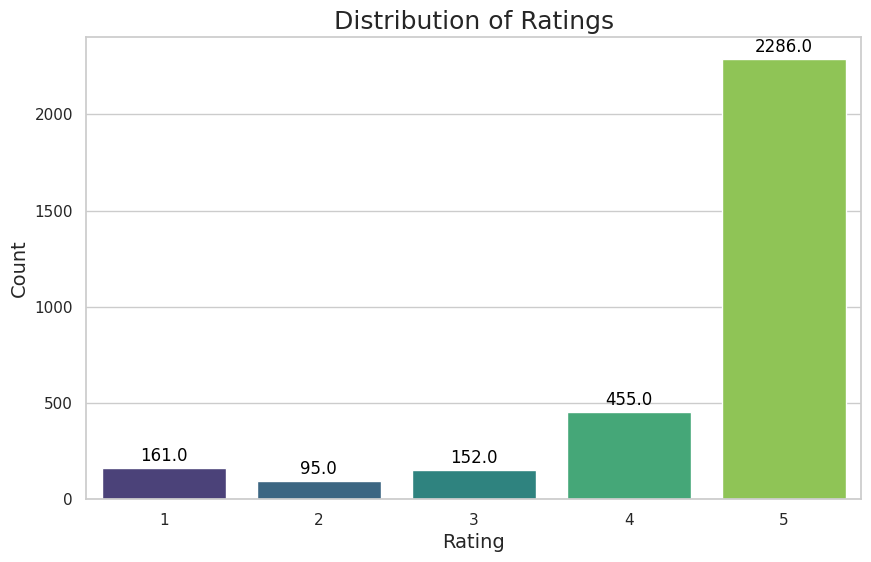

In [14]:
# Plot the count plot for the ratings
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(10, 6))

# Plot the count plot for the ratings with seaborn
ax = sns.countplot(x=df['rating'], palette="viridis")

# Customize the plot aesthetics
ax.set_title('Distribution of Ratings', fontsize=18)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()

#### Insights:

* The majority of customers have provided highly positive ratings (4 and 5).
* There is a relatively smaller number of neutral or mixed reviews (rating 3).
* Negative reviews (ratings 1 and 2) are present but constitute a smaller portion of the dataset.

## count plot for the feedback

<ipython-input-15-343e3af61fe4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['feedback'], palette="Set2")


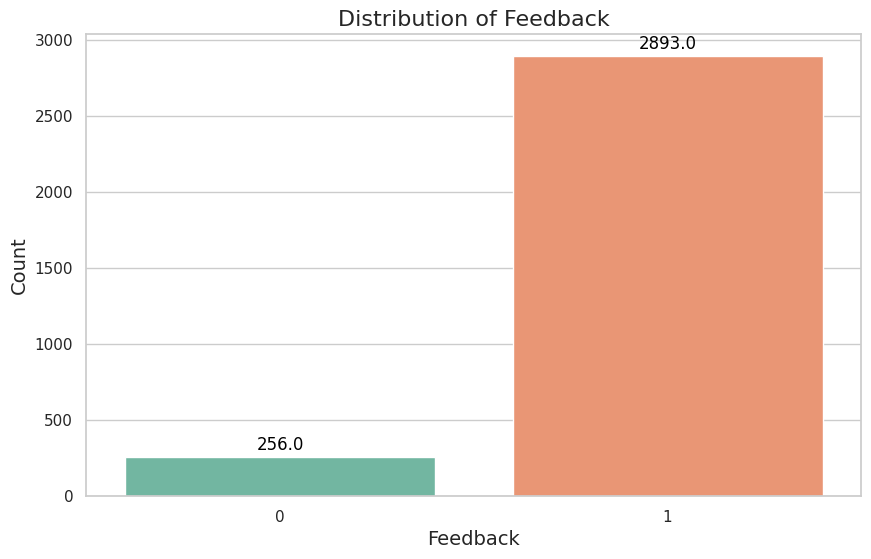

In [15]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(10, 6))

# Plot the count plot for the feedback with seaborn
ax = sns.countplot(x=df['feedback'], palette="Set2")

# Customize the plot aesthetics
ax.set_title('Distribution of Feedback', fontsize=16)
ax.set_xlabel('Feedback', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()

### Insights:

* The dataset is skewed toward positive feedback, with a significantly higher number of positive instances.
* Negative feedback is present but is a minority in the dataset.

## count plot for product variations

<ipython-input-16-b8a558dae391>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['variation'], order=df['variation'].value_counts().index, palette="muted")
<ipython-input-16-b8a558dae391>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


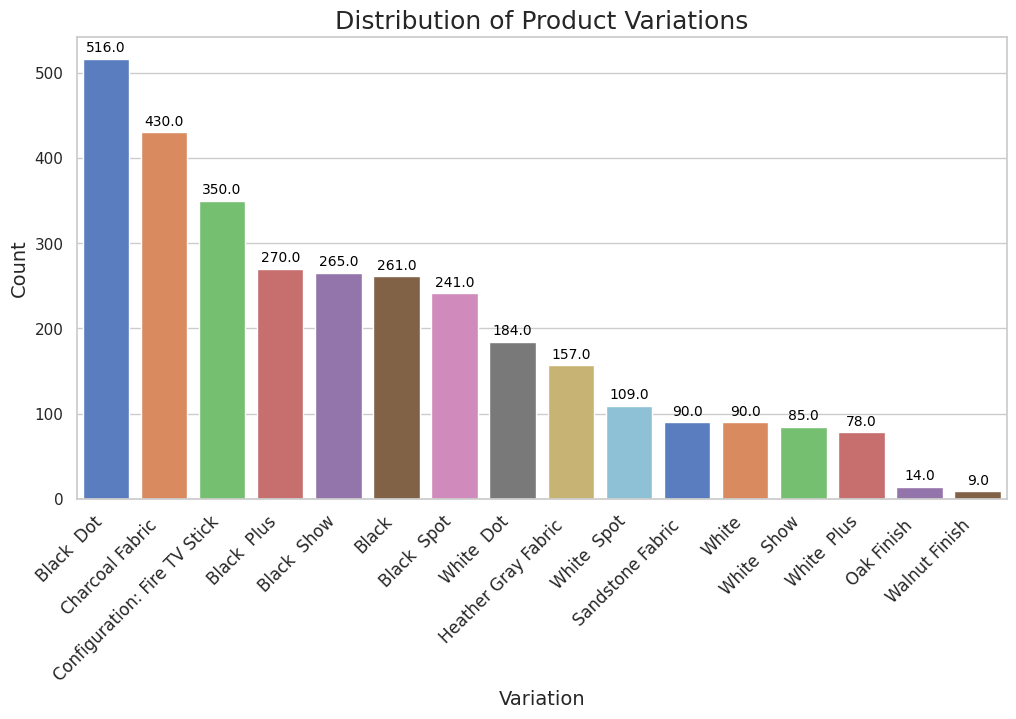

In [16]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(12, 6))

# Plot the count plot for product variations with seaborn
ax = sns.countplot(x=df['variation'], order=df['variation'].value_counts().index, palette="muted")

# Customize the plot aesthetics
ax.set_title('Distribution of Product Variations', fontsize=18)
ax.set_xlabel('Variation', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()

### Insights
* Most Popular Variation: The Black Dot is the most popular product variation among the ones listed, with a count of 516.0.
* Least Popular Variation: The White Finish has the least popularity, with a count of only 9.0.
* Variation Distribution: The variations like Coral Pink and Fire TV Stick also show significant popularity, indicating a diverse range of preferences among customers.
* Product Range: The presence of multiple product variations suggests that Amazon Alexa offers a wide range of products to cater to different customer tastes and preferences.

# Perform Data Exploration

Now, let's proceed with data exploration to gain more insights into the dataset. This involves analyzing the 'verified_reviews' column, exploring the length of reviews, and visualizing the distribution of review lengths.

**Convert to String: Ensures that the 'verified_reviews' column is treated as strings for further analysis.**


In [17]:
# Convert 'verified_reviews' to string
df['verified_reviews'] = df['verified_reviews'].astype(str)

**Create 'length' Column: Helps analyze the length of each review, which might be indicative of the level of detail or sentiment**

In [18]:
# Create a new column 'length' representing the length of reviews
df['length'] = df['verified_reviews'].apply(len)

**Plot Histogram: Visualizes the distribution of review lengths, allowing us to identify patterns and outliers**

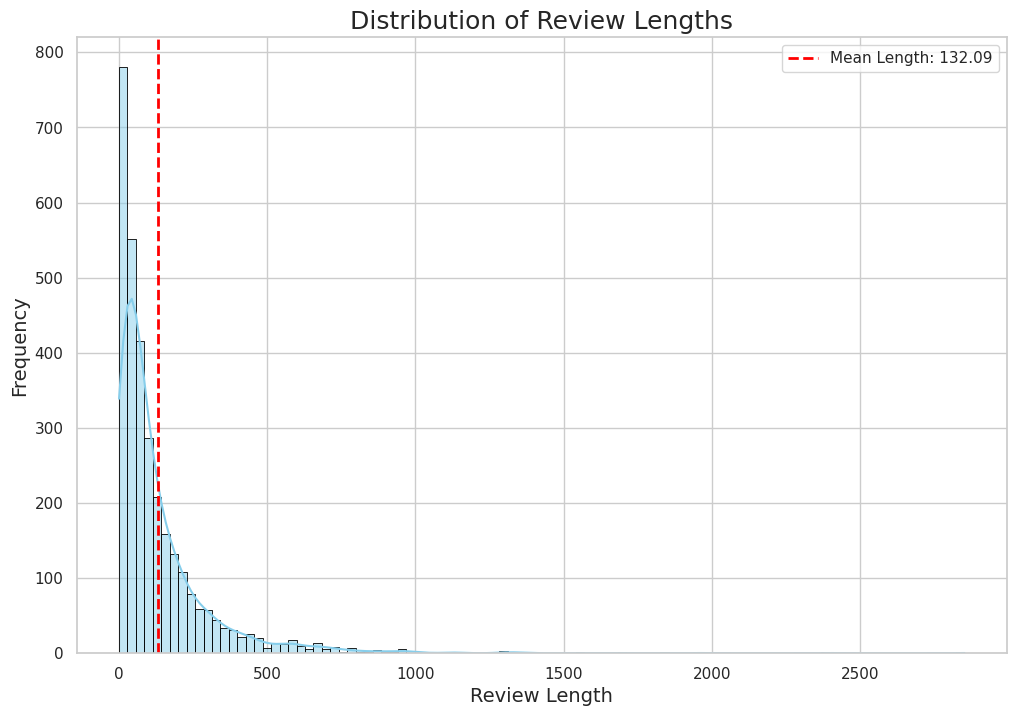

In [19]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axes with specified size
plt.figure(figsize=(12, 8))

# Plot the histogram for review lengths
ax = sns.histplot(df['length'], bins=100, kde=True, color='skyblue', edgecolor='black')

# Customize the plot aesthetics
ax.set_title('Distribution of Review Lengths', fontsize=18)
ax.set_xlabel('Review Length', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add vertical line for mean review length
mean_length = df['length'].mean()
ax.axvline(x=mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean Length: {mean_length:.2f}')

# Add legend
ax.legend()

# Display the plot
plt.show()


**Statistical Summary: Provides a quantitative summary of the review lengths, including mean, standard deviation, minimum, and maximum values.**

In [20]:
# Display statistical summary for review lengths
print("\nStatistical Summary for Review Lengths:")
print(df['length'].describe())


Statistical Summary for Review Lengths:
count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64


**Explore Longest Review: Examining the longest review provides insights into the level of detail, content, and sentiments expressed in extensive reviews.**

**Display Longest Review: Allows for a closer look at the content of the longest review and understanding what specific aspects customers may elaborate on extensively.**

In [21]:
# Identify and display the longest review
longest_review = df[df['length'] == df['length'].max()]['verified_reviews'].iloc[0]
print("Longest Review:\n\n")
print(longest_review)

Longest Review:


Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order cam

# Plot the WordCloud

Word clouds are a visually appealing way to represent the most frequently occurring words in a collection of text. In this case, we'll create separate word clouds for positive and negative reviews to identify key words associated with each sentiment.

## Create WordCloud for Positive Reviews

**Visualizes the most frequent words in positive reviews, providing insights into positive sentiments and common positive expressions.**

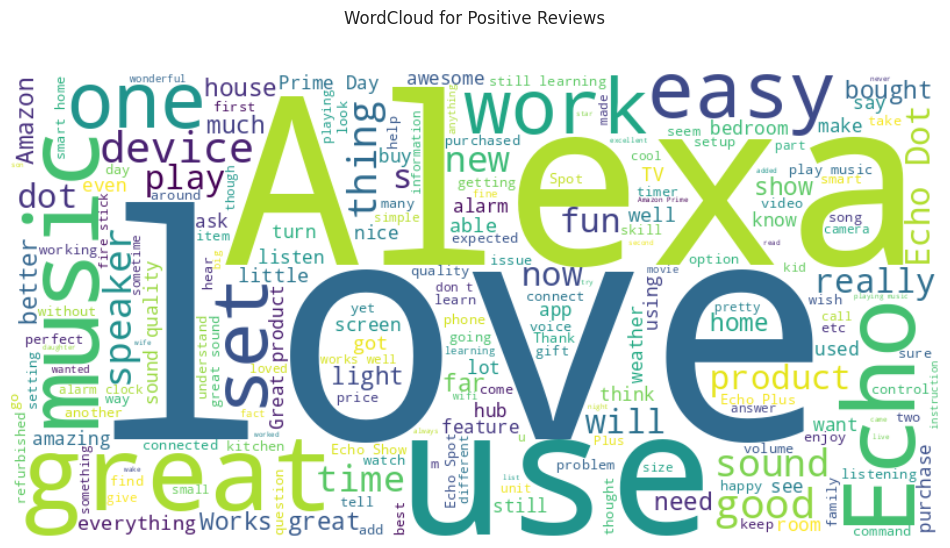

In [22]:
# Obtain only the positive reviews
positive_reviews = df[df['feedback'] == 1]['verified_reviews']

# Convert positive reviews to a single string
positive_reviews_text = " ".join(positive_reviews)

# Generate and plot the WordCloud for positive reviews
plt.figure(figsize=(12, 8))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews\n\n')
plt.show()

 ## Create WordCloud for Negative Reviews
 **Visualizes the most frequent words in negative reviews, highlighting terms associated with negative sentiments.**


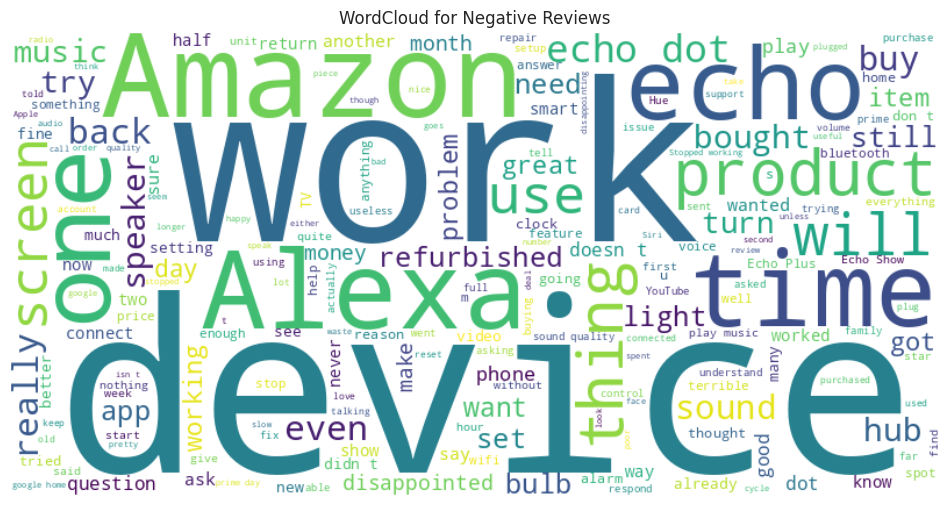

In [23]:
# Obtain the negative reviews only
negative_reviews = df[df['feedback'] == 0]['verified_reviews']

# Convert negative reviews to a single string
negative_reviews_text = " ".join(negative_reviews)

# Generate and plot the WordCloud for negative reviews
plt.figure(figsize=(12, 8))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()

# Text Data Cleaning

## Remove Punctuation: Eliminates unnecessary punctuation marks that may not contribute to sentiment analysis.

In [24]:
# Sample text with punctuation
sample_text = "$I love Data Science &and Analysis By Nomaan Galiyara ...!!!!"

# Remove punctuation
text_no_punct = [char for char in sample_text if char not in string.punctuation]

# Join the characters to form the cleaned string
cleaned_text = ''.join(text_no_punct)

# Display the cleaned text
print("Original Text:")
print(sample_text)
print("\nText after Punctuation Removal:")
print(cleaned_text)

Original Text:
$I love Data Science &and Analysis By Nomaan Galiyara ...!!!!

Text after Punctuation Removal:
I love Data Science and Analysis By Nomaan Galiyara 


## **Remove Stopwords: Filters out common words (stopwords) that are unlikely to carry sentiment and can be ignored**

In [25]:
# Download stopwords (if not already downloaded)
nltk.download('stopwords')

# Remove stopwords
cleaned_text_no_stopwords = [word for word in cleaned_text.split() if word.lower() not in stopwords.words('english')]

# Display the text after removing stopwords
print("\nText after Stopwords Removal:")
print(cleaned_text_no_stopwords)


Text after Stopwords Removal:
['love', 'Data', 'Science', 'Analysis', 'Nomaan', 'Galiyara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 # Perform Count Vectorization (Tokenization)
* **Count Vectorization is the process of converting a collection of text documents into numerical feature vectors. Each document is represented by a vector, and the value of each feature (word) is the frequency of that word in the document. This step prepares the text data for training machine learning models.**

![image.png](attachment:image.png)

## Sample

In [26]:
# Sample text data
corpus_sample = ["This is a sample sentence.", "Another example sentence."]

# Create a CountVectorizer
vectorizer_sample = CountVectorizer()

# Fit and transform the data
X_sample = vectorizer_sample.fit_transform(corpus_sample)

# Get the feature names
feature_names_sample = vectorizer_sample.get_feature_names_out()

# Display feature names and the transformed data
print("Feature Names:")
print(feature_names_sample)
print("\nTransformed Data:")
print(X_sample.toarray())

Feature Names:
['another' 'example' 'is' 'sample' 'sentence' 'this']

Transformed Data:
[[0 0 1 1 1 1]
 [1 1 0 0 1 0]]


* CountVectorizer: Converts text data into a matrix of word counts.
* Fit and Transform: Learns the vocabulary and transforms the data into a numerical representation.
* Feature Names: Retrieves the names of the features (words) in the transformed data.

**This step is essential for turning text data into a format that machine learning models can understand**

# Create a Pipeline to Remove Punctuation, Stopwords, and Perform Count Vectorization

**A pipeline is a way to streamline a lot of routine processes, making the code cleaner and more efficient. In this task, we'll create a pipeline that combines the steps of removing punctuation, removing stopwords, and performing count vectorization.**

## Define the Cleaning Pipeline Function

In [27]:
# Define the cleaning pipeline function
def message_cleaning(message):
    # Remove punctuation
    text_no_punct = [char for char in message if char not in string.punctuation]
    cleaned_text = ''.join(text_no_punct)

    # Remove stopwords
    cleaned_text_no_stopwords = [word for word in cleaned_text.split() if word.lower() not in stopwords.words('english')]
    return cleaned_text_no_stopwords

In [28]:
# Let's check the cleaning function
df_clean = df['verified_reviews'].apply(message_cleaning)

In [29]:
# show the original review
print('Original Text : ',df['verified_reviews'][5])

Original Text :  I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [30]:
# show the cleaned up version
print("Text after Cleaning:")
print(df_clean[5])

Text after Cleaning:
['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [31]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
df_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [32]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [33]:
print(df_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
df_countvectorizer.shape

(3149, 5211)

In [36]:
X_vectorized = pd.DataFrame(df_countvectorizer.toarray())


* Cleaning Function: The message_cleaning function is defined to remove punctuation and stopwords from text data.
* Pipeline: Combines the cleaning function with CountVectorizer to create a streamlined process.
* Fit and Transform: Applies the pipeline to the 'verified_reviews' column, converting text data into numerical feature vectors.
    
**Using a pipeline ensures that the same preprocessing steps are applied consistently to both training and testing data**

# Split the Data into Training and Testing Sets

## Define features (X) and target variable (y)

In [37]:

X = X_vectorized
y = df['feedback']

## Split the data into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Evaluating the Model

![image.png](attachment:image.png)

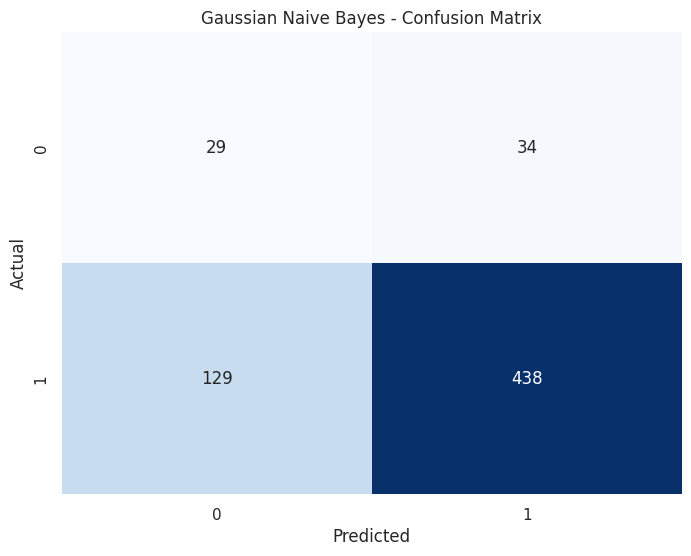


Gaussian Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.46      0.26        63
           1       0.93      0.77      0.84       567

    accuracy                           0.74       630
   macro avg       0.56      0.62      0.55       630
weighted avg       0.85      0.74      0.79       630


Gaussian Naive Bayes - Additional Metrics:
Accuracy: 0.7413
Precision: 0.9280
Recall: 0.7725
F1 Score: 0.8431




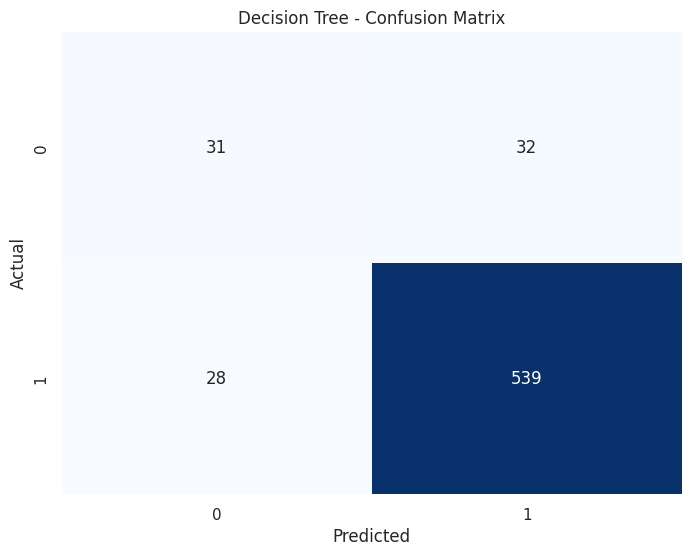


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51        63
           1       0.94      0.95      0.95       567

    accuracy                           0.90       630
   macro avg       0.73      0.72      0.73       630
weighted avg       0.90      0.90      0.90       630


Decision Tree - Additional Metrics:
Accuracy: 0.9048
Precision: 0.9440
Recall: 0.9506
F1 Score: 0.9473




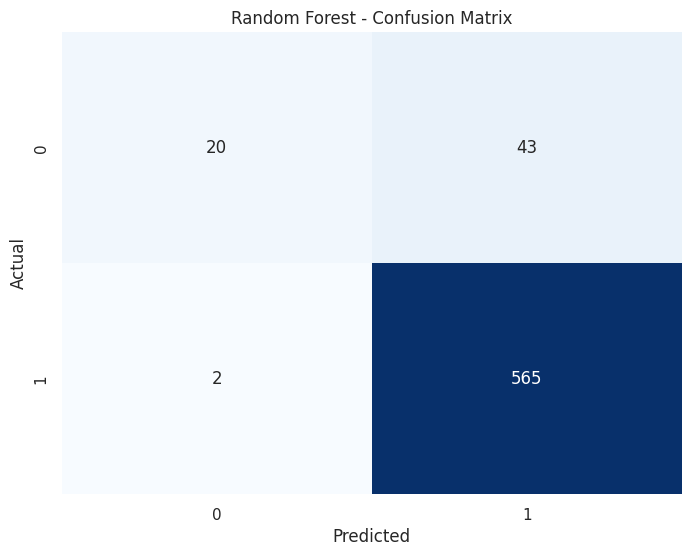


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.32      0.47        63
           1       0.93      1.00      0.96       567

    accuracy                           0.93       630
   macro avg       0.92      0.66      0.72       630
weighted avg       0.93      0.93      0.91       630


Random Forest - Additional Metrics:
Accuracy: 0.9286
Precision: 0.9293
Recall: 0.9965
F1 Score: 0.9617




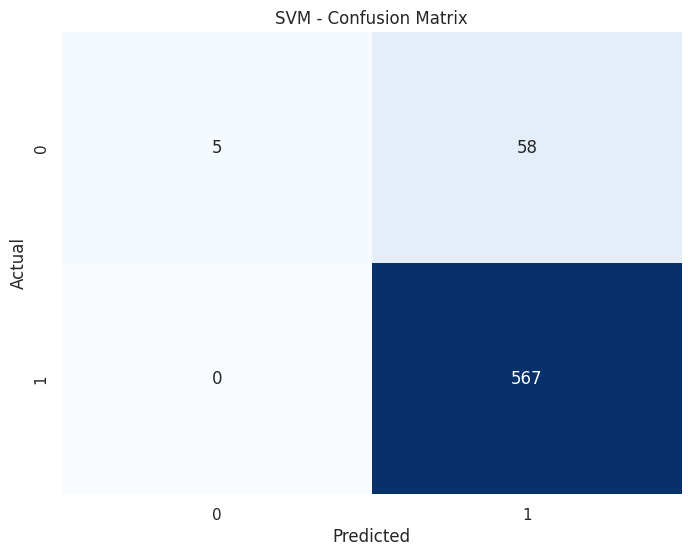


SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        63
           1       0.91      1.00      0.95       567

    accuracy                           0.91       630
   macro avg       0.95      0.54      0.55       630
weighted avg       0.92      0.91      0.87       630


SVM - Additional Metrics:
Accuracy: 0.9079
Precision: 0.9072
Recall: 1.0000
F1 Score: 0.9513




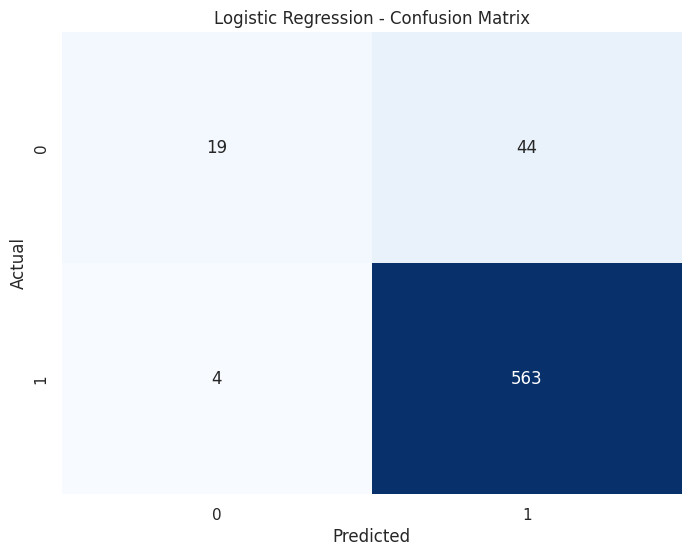


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.30      0.44        63
           1       0.93      0.99      0.96       567

    accuracy                           0.92       630
   macro avg       0.88      0.65      0.70       630
weighted avg       0.92      0.92      0.91       630


Logistic Regression - Additional Metrics:
Accuracy: 0.9238
Precision: 0.9275
Recall: 0.9929
F1 Score: 0.9591




In [39]:
# List of classifiers
classifiers = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Iterate through each classifier
for name, classifier in classifiers.items():
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_predict_test = classifier.predict(X_test)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_predict_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Display classification report
    print(f'\n{name} - Classification Report:')
    print(classification_report(y_test, y_predict_test))

    # Additional evaluation metrics
    accuracy = accuracy_score(y_test, y_predict_test)
    precision = precision_score(y_test, y_predict_test)
    recall = recall_score(y_test, y_predict_test)
    f1 = f1_score(y_test, y_predict_test)

    print(f'\n{name} - Additional Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    print('\n' + '='*50 + '\n')